# Klasyfikacja stopnia sukcesu filmu

## Autorzy

Ilya Pauliuk (217344), Adam Ropelewski (217518), Dawid Rychlik (217264), Jakub
Szala (217367)

## Streszczenie

Wykonany przez nas projekt zajmuję się klasyfikacją filmów ze względu na spodziewaną ocenę przez ich odbiorców. W tym celu wykorzystujemy sprawdzone metody klasyfikacji, które mają swoje implementacje w bibliotece scikit-learn. Wymagało to dokładnej obróbki danych.

Większość filmów należy do gorszej grupy. Jedynie koło 10% filmów można nazwać "dobrymi". Osiągamy około 73% dokładności klasyfikacji.

## Słowa kluczowe

Filmy, IMDB, klasyfikacja metodami: najbliższych sąsiadów, regresji logistycznej; klasteryzacja metodą k-średnich, analiza zależności zmiennych metodą regresji liniową

## Wprowadzenie

W latach osiemdziesiątych obejrzenie filmu wymagało wizyty w kinie lub ograniczenia się do reperteuru proponowanego przez telewizję. W erze, gdy kino było jeszcze ekscytującą nowością, każdy postęp w dziedzinie kinematografii, czy to w reżyserii czy w efektach specjalnych, sprawiał, że dzieło utrwalało się pozytywnie w pamięci widzów. Te czasy jednak minęły, a coraz to bardziej ekstrawaganckie elementy dokonywane w postprodukcji nie robią już tak dużego wrażenia.

 Teraz dostęp do popkultury jest na wyciągnięcie ręki, kilka kliknięć pozwala nam przeglądać niezliczonych biblioteki serwisów streamingowych takich jak Netflix, Max, Hulu, Disney+ etc. W dzisiejszych czasach odbiorcy proponowana jest cały wachlarz produkcji, z których większość nie zapada mu w pamięć. Określenie czy dane dzieło kina wzbudzi u odbiorcy pozytywną reakcję, tym samym zasługując na zakup przez platformę streamingową, jest zadaniem niełatwym. W dodatku biorąc pod uwagę dużą ilość powstałych ekranizacji i tego, że kolejne powstają co roku — czasochłonnym. 

W celu stworzenia modelu statystycznego wykorzystujemy dane około 26 mln ocen użytkowników ze strony GroupLens. We wspomnianych danych pojawiły się liczne braki wymagające obsłużenia. Ze względu na dużą objętość danych filmy posiadające braki nie brały udziału w uczeniu modelu.

Po przetworzeniu danych zajeliśmy się klasteryzacją przy pomocy metody k-średnich. Odkryliśmy, że odpowiednia ilość klastrów, to 2. Na tej podstawie powstały grafy wygenerowane przy pomocy Seaborn, które to pomogły w ocenie użyteczności zmiennych uczących.

## Opis danych wejściowych

Dane pozyskaliśmy z serwisu kaggle, zawierały one około 26 mln ocen użytkowników zebranych przez GroupLens. Należało zsumować oceny konkretnego dzieła i podzielić je przez ich ilość ocen, a następnie przydzielić do konkretnych filmów. W ten sposób uzyskaliśmy średnią ocenę dla każdego z filmów. Posłuży ona jako zmienna y — wartość walidacyjna. 

W ten sposób uzyskaliśmy dane wyjściowe, które możemy wykorzystać do treningu modelów na podstawie cech:
1. Średnia ocena użytkowników
2. Budżet
3. Reżyser
4. Aktor grający główną rolę
5. Gatunek
6. Orginalny język
7. Data premiery
8. Przychód
9. Ilość dubbingów #DO ZMIANY#
10. Czas trwania
11. Główny kraj produkcji
12. Liczba głosów

## Konwersja typów zmiennych

Dane z postaci tekstowej zostały przekonwertowane do podpowiednich fomatów:
 - Budżet - liczba całkowita
 - Reżyser - unikalne id (liczba całkowita)
 - Główny aktor - unikalne id (liczba całkowita)
 - Gatunek - unikalne id (liczba całkowita)
 - Orginalny język - unikalne id (liczba całkowita)
 - Data premiery - liczba całkowita rok miesiąc np. 202201
 - Przychód - liczba całkowita
 - Ilość dubbingów - liczba całkowita
 - Czas trwania (w sekundach) - liczba całkowita
 - Główny kraj produkcji - unikalne id (liczba całkowita)
 - Liczba głosów - liczba całkowita

### Średnia ocena użytkowników

To wartość liczbowa reprezentująca przeciętną ocenę przyznaną filmowi przez użytkowników na platformie Netflix. Skala wynosi od 0 do 5. Wysoka średnia ocena zazwyczaj przekłada się na pozytywne przyjęcie filmu przez publiczność.

### Reżyser

Reżyser jest znaczącą rolą w procesie tworzenia filmu. Znane osoby jak Quentin Tarantino, Tim Burton, czy Christopher Nolan potrafią przyciągnąć samym swoim nazwiskiem do sal kinowych. Zarówno sympatia ich fanów, jak i zdolności reżyserskie wpływają pozytywnie na odbiór filmu.  

### Aktor grający główną rolę

Aktor, bądź aktorka grający główną rolę są odpowiedzialni za wizerunek filmu, to ona będzie widoczna na plakatach promujących. Aktorzy są nawet bardziej znani niż reżyserzy. Ich status celebryty potrafi przyciągać tłumy.

### Budżet

Całkowity koszt produkcji filmu. Zakres wartości: od setek do setek milionów dolarów. Budżet potrafi znacząco wpłynąć na sukces wśród widowni, choć wiele klasycznych produkcji pokazuje, że i z niskim budżetem można wywrzeć wrażenie na publiczności.

### Gatunek

Kategoria tematyczna filmu (np. komedia, dramat, horror, science fiction). Zakres wartości: id głównego gatunek filmu. Można się spodziewać, że pewne gatunki przyciągają większą widownię. 

### Język oryginału

Język, w którym film został pierwotnie nagrany i wyprodukowany. Zakres wartości: id języka będące liczbą całkowitą dodatnią. Filmy, których oryginalny język jest popularny na świecie jak angielski, chiński czy hiszpański zazwyczaj trafiają do większej ilości odbiorców.

### Data premiery

Data, kiedy film został po raz pierwszy wyświetlony publicznie. Zakres wartości: format daty (YYYYMM). Filmy z pewnych okresów cieszą się lepszą opinią.

### Przychód

Całkowity przychód wygenerowany przez film. Zakres wartości: od kilku do miliardów dolarów. Przychód jest wskaźnikiem komercyjnego sukcesu filmu, zazwyczaj przekłada się na ocenę filmu.

### Ilość dubbingów

Liczba języków, na które film został przetłumaczony. Zakres wartości: może wynosić od 0 do kilkudziesięciu. Dubbing pozostaje jedną z najbardziej popularnych form przygotowania filmu do odbioru przez obcokrajowców. 

### Czas trwania

Całkowity czas trwania filmu, podany w minutach. Zakres wartości: od około 20-minutowych do nawet ponad 200 minut. Czas trwania bezpośrednio ma wpływ na ocenę. Filmy zbyt długie stają się nużące, a krótkie mogą nie zaspokoić potrzeby widza.

### Kraj produkcji

Id kraju (liczba całkowita), będącego głównym krajem produkcji

### Liczba głosów

Całkowita liczba ocen oddanych przez użytkowników. Zakres wartości: może wynosić od kilku do milionów. Większa liczba głosów przekłada się na popularność i wiarygodność średniej oceny filmu.

## Wizualizacja danych

Do wizualizacji danych, używamy biblioteki pyplot i seaborn.

#### Importowanie bibliotek i danych z pliku .csv

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from constants import NUMERICAL_COLUMNS

file_path = "output/movies_relevant_data.csv"
movies_df = pd.read_csv(file_path)
movies_df['release_date'] = movies_df['release_date'] / 100


numerical_columns = [
    "avg_of_rating",
    #"director_id",
   # "top_actor_id",
    "budget",
   # "genres",
    "original_language",
    "release_date",
    "revenue",
    #"spoken_languages",
    "runtime",
    "production_countries",
    "vote_count",
]

# polskie nazwy kolumn
polish_column_names = [
    "średnich ocen",
    "budżetu",
    "język oryginalnego",
    "daty premiery",
    "dochodu",
    "czasu trwania",
    "krajów produkcji",
    "liczby ocen",
]

#### Rozkład cech

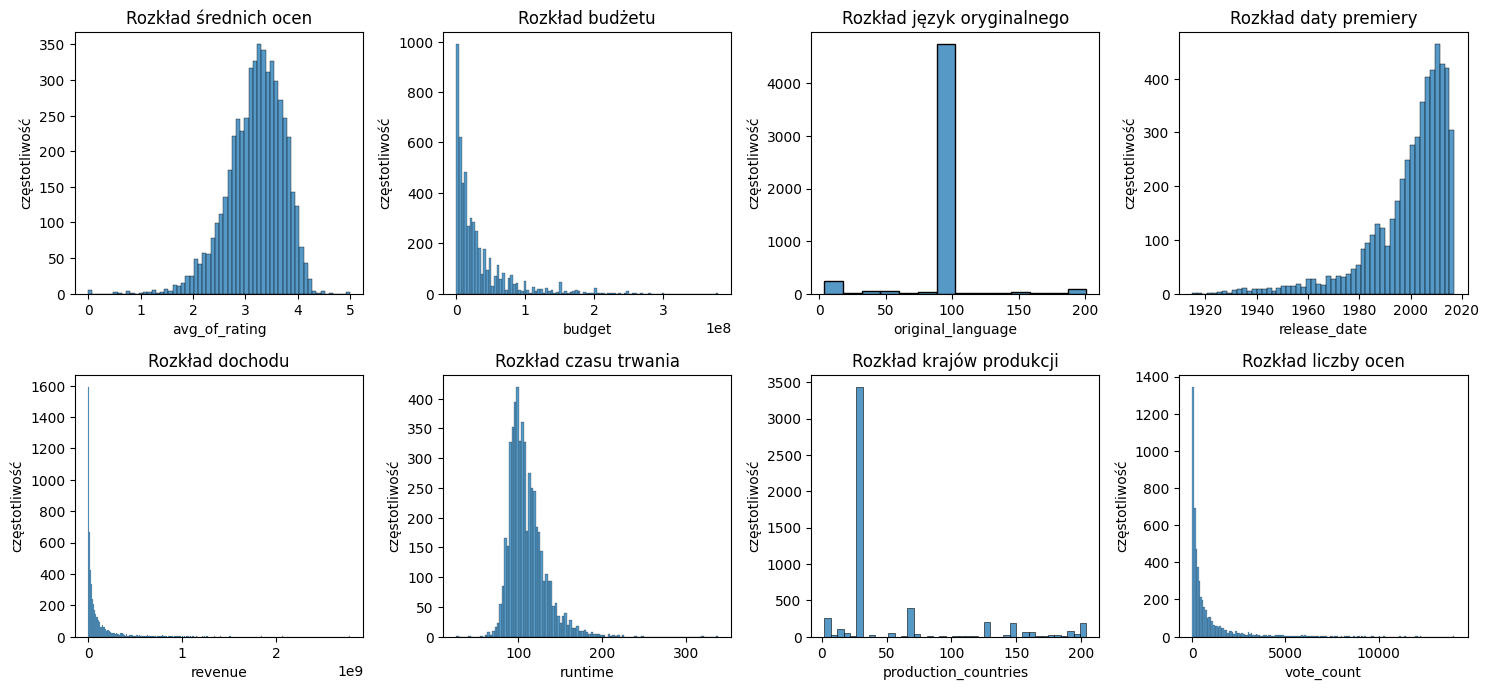

In [42]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(movies_df[col])
    plt.title(f'Rozkład {polish_column_names[i-1]}')
    plt.xlabel(col)
    plt.ylabel('częstotliwość')
plt.tight_layout()
plt.show()

##### Średnia ocena

Częstotliwość średnich posiada rozkład normalny, przesunięty nieznacznie w prawą stronę osi X. Jak większość zjawisk w przyrodzie w społeczeństwie najczęściej spotykane są filmy przeciętne. Z oceną około 3. Przesuniecie, prawdopodobnie wynika z niechęci użytkowników do zostawiania najniższych ocen.

##### Rozkład budżetu

Znacząca większość filmów posiada budżet poniżej 100 milionów dolarów, najczęściej występujący, to około miliona dolarów. Nieliczne produkcje posiadają budżet miniaturowy budżet, nawet 250 dolarów.

##### Rozkład częstotliwości języka orginalnego

Najczęściej spotykanym ID języka jest to należące do angielskiego. Nie jest to zaskoczeniem, jako że jest to język międzynarodowy. 

##### Rozkład roku premiery

Zauważyć na tym histogramie można tendencję wzrostową, wraz z biegiem lat coraz więcej filmów jest produkowanych. W dodatku premiera nowego dzieła potencjalnie przyciąga uwagę klientów.  

##### Rozkład dochodu

Dochód zależy od rodzaju filmu, pewne z nich tzw. blockbustery są tworzone z myślą o dochodzie. Kino artystyczne lub filmy ze słabym marketingiem, czy wypuszczone w mało dochodowych formach jak np. tylko DVD zarobią mniej niż takie dostępne w kinach. Większość filmów blockbusterami nie jest i ich dochód jest mniejszy od 30 milionów dolarów. 

##### Rozkład czasu trwania

Najczęściej pojawiającą się wartością jest bez niespodzianki 90 minut, co jest popularną wartością dla większości filmów pełnometrażowych, animacji etc.

##### Kraj produkcji

Od kraju produkcji zależą studia, które mogły produkować film i sceneria. 

##### Rozkład ilości głosów na osobę

Histogram jednoznacznie pokazuje, że większość użytkowników zostawia od kilku do kilkunastu ocen. 

#### Tendencja przychodu na przestrzeni lat

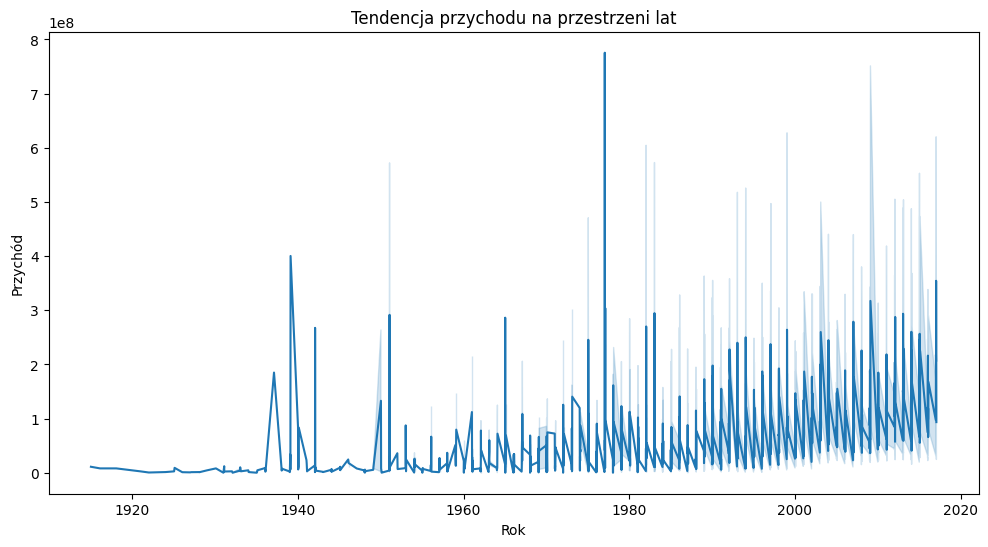

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='revenue', data=movies_df)
plt.title('Tendencja przychodu na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Przychód')
plt.show()

Przychód ze wszystkich filmów na przestrzeni lat rósł, z okresowymi nagłymi i znaczącymi skokami w poszczególnych latach. Najbardziej jest to dostrzegalne w późnych latach 70. Warto pamiętać, że nieuwzględniona zostaje tu inflacja. 

#### Tendencja budżetu na przestrzeni lat

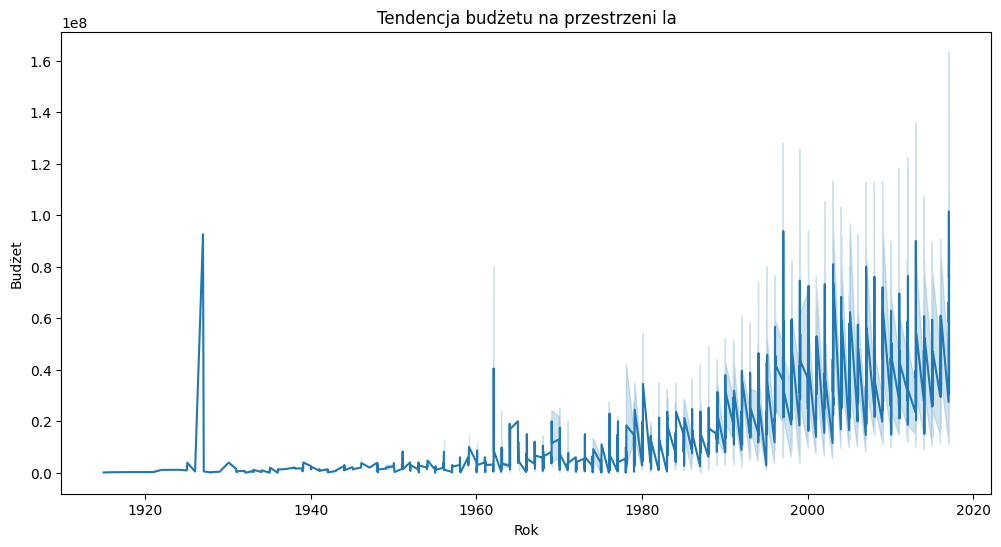

In [44]:
# # Plotting the trend of budget over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='budget', data=movies_df)
plt.title('Tendencja budżetu na przestrzeni la')
plt.xlabel('Rok')
plt.ylabel('Budżet')
plt.show()

Z biegiem czasu budżet stopniowo wzrasta. Za to potencjalnie może być odpowiedzialne wiele czynników, od wzrastających wypłat aktorów, reżyserów, ekip od efektów specjalnych, muzyki etc; po inflację i rosnące koszta technologii filmowych. 

#### Relacja między budżetem, a przychodem

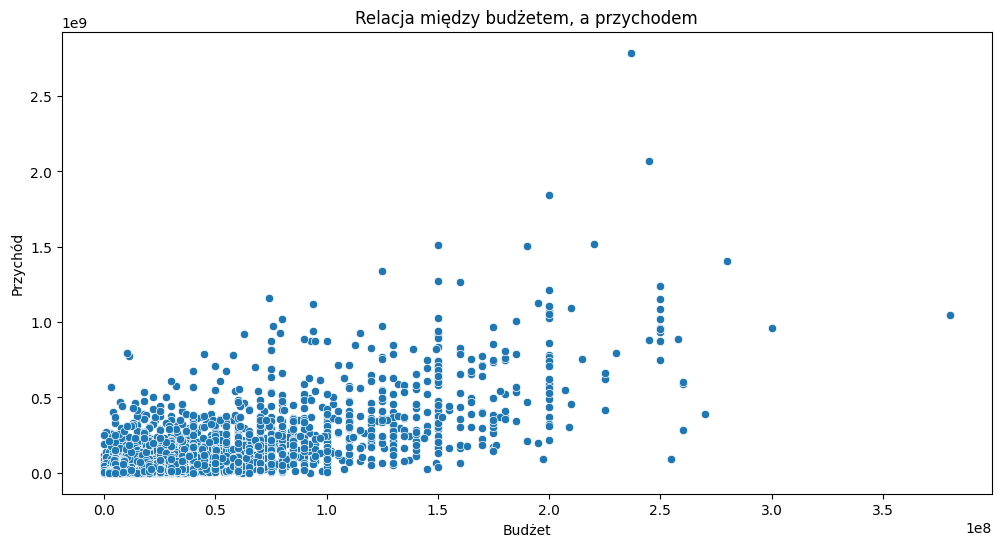

In [45]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='budget', y='revenue', data=movies_df)
plt.title('Relacja między budżetem, a przychodem')
plt.xlabel('Budżet')
plt.ylabel('Przychód')
plt.show()

Powyższy wykres przedstawią relacje budżetu i przychodu. O ile najbardziej dochodowe filmy posiadają wysoki budżet, to wiele filmów o niskim budżecie byo bardziej oplacalnych bo przynioslo większy dochód niż w nie zainwestowano

#### Relacja między budżetem, a średnią oceną

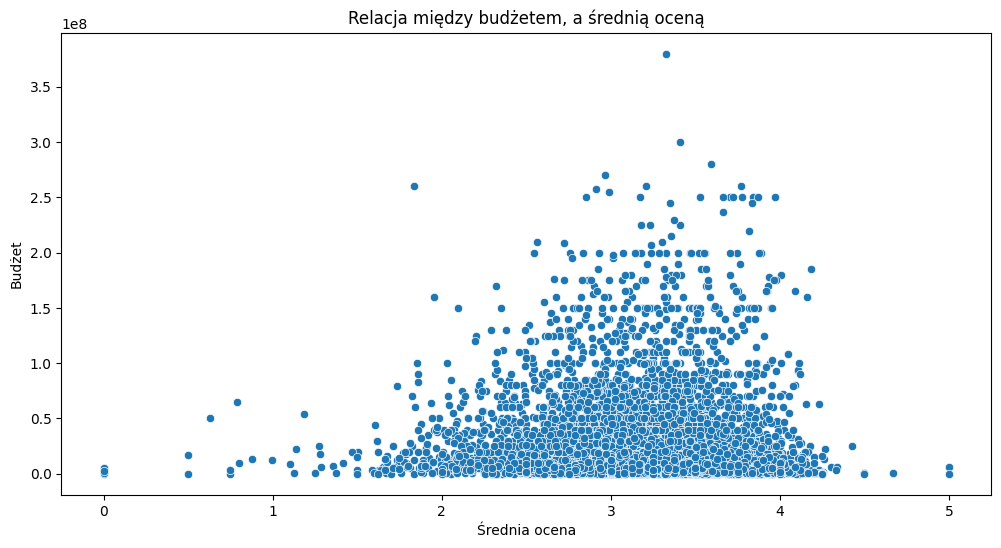

In [46]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_of_rating', y='budget', data=movies_df)
plt.title('Relacja między budżetem, a średnią oceną')
plt.xlabel('Średnia ocena')
plt.ylabel('Budżet')
plt.show()

Można zauważyć, że w przeciwieństwie do relacji między budżetem, a dochodem to wyższy budżet zapewnia ocenę, która w najgorszym wypadku będzie zbliżona do przeciętniej. Filmy o niskim budżecie mają większy rozrzut ocenowy, niz te z wysokim. Spodziewać się można, że bardziej będą na s 

#### Statystyki opisowe

Wykorzystująć wbudowane metody do klasy dataFrame z biblioteki pandas, obliczyliśmy statystyki opisowe i przedstawiliśmy w formie tabeli:

In [47]:
data = [[] for _ in range(len(numerical_columns))]

for i, col in enumerate(numerical_columns, 1):
    data[i-1].append(col)
    data[i-1].append(round(movies_df[col].mean(), 2))
    data[i-1].append(round(movies_df[col].median(), 2))
    data[i-1].append(round(movies_df[col].min(), 2))
    data[i-1].append(movies_df[col].max())
    data[i-1].append(round(movies_df[col].std(), 2))
    data[i-1].append(round(movies_df[col].var(), 2))
    data[i-1].append(round(movies_df[col].sum(), 2))
    data[i-1].append(round(movies_df[col].count(), 2))
    data[i-1].append(round(movies_df[col].quantile(0.25), 2))
    data[i-1].append(round(movies_df[col].skew(), 2))

# tworzenie DataFrame z danymi statystycznymi i polskimi nazwami kolumn
pd.DataFrame(data, columns=["Kolumna", "Średnia", "Mediana", "Minimum", "Maksimum", "Odchylenie standardowe", "Wariancja", "Suma", "Liczba wartości", "Kwartyl 1", "Skośność"])

Kolumna      Średnia      Mediana  Minimum      Maksimum  \
0         avg_of_rating         3.20         3.26     0.00  5.000000e+00   
1                budget  31552083.18  17000000.00     1.00  3.800000e+08   
2     original_language        97.04       100.00     4.00  2.010000e+02   
3          release_date      1999.90      2004.11  1915.02  2.017080e+03   
4               revenue  91866701.87  30859000.00     1.00  2.787965e+09   
5               runtime       110.15       106.00    26.00  3.380000e+02   
6  production_countries        52.72        27.00     2.00  2.040000e+02   
7            vote_count       745.43       286.00     1.00  1.407500e+04   

   Odchylenie standardowe     Wariancja          Suma  Liczba wartości  \
0            5.300000e-01  2.800000e-01  1.690635e+04             5283   
1            4.035987e+07  1.628919e+15  1.666897e+11             5283   
2            2.451000e+01  6.007700e+02  5.126840e+05             5283   
3            1.576000e+01  2.483100e+02  1.056548e+07             5283   
4            1.672671e+08  2.797828e+16  4.853318e+11             5283   
5            2.151000e+01  4.626400e+02  5.819020e+05             5283   
6            5.329000e+01  2.839350e+03  2.785040e+05             5283   
7            1.259270e+03  1.585763e+06  3.938107e+06             5283   

    Kwartyl 1  Skośność  
0        2.88     -0.85  
1  5830000.00      2.50  
2      100.00     -0.93  
3     1994.07     -1.83  
4  7637468.50      4.44  
5       95.00      1.64  
6       27.00      1.69  
7       84.00      3.70

### Braki danych

Spotkaliśmy się z wieloma brakami danych, przede wszystkim w kolumnie revenue i budget (przychód i budżet). Aby stworzony przez nas model był jak najbardziej dokładny, owe rekordy z brakami zostały usunięte. Posiadana ilość danych jest na tyle wysoka, że nie powinno to zmienić jego efektywności. 

### Obserwacje odstające

Ze względu na specyfikę i różnorodność produkcji filmowych, postanowiliśmy nie usuwać odstających danych, nie zaszła taka potrzeba.  

## Klasteryzacja

Dane dodatkowo podzieliliśmy na grupy, przy pomocy klasteryzacji metodą k-n średnich:  

Optymalna ilość grup: 2


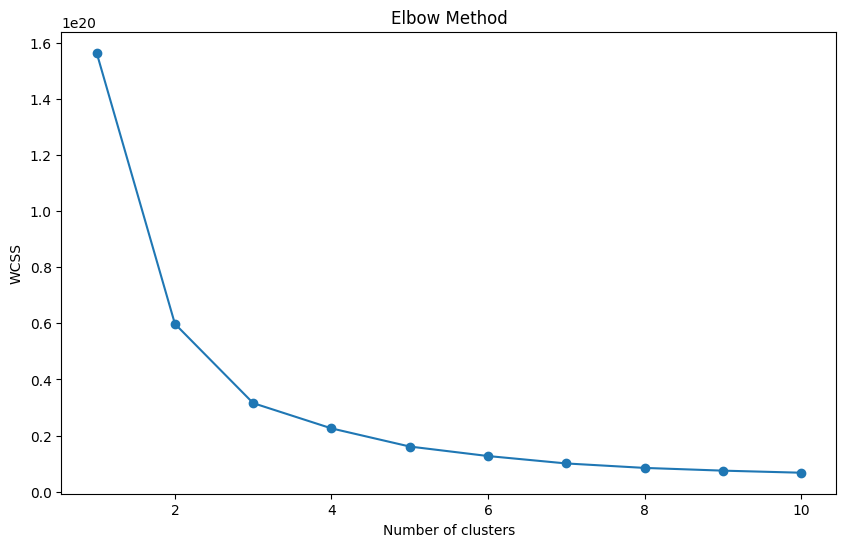

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from constants import NUMERICAL_COLUMNS

file_path = "output/movies_relevant_data_num_ids.csv"
movies_df = pd.read_csv(file_path)
clustering_features_simple = NUMERICAL_COLUMNS

X_clustering_simple = movies_df[clustering_features_simple]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X_clustering_simple)
    wcss.append(kmeans.inertia_)

second_derivative = (
    [0] + [wcss[i] - 2 * wcss[i + 1] + wcss[i + 2] for i in range(len(wcss) - 2)] + [0]
)

# The optimal k is where the second derivative is maximum
optimal_k = second_derivative.index(max(second_derivative)) + 1

print(f"Optymalna ilość grup: {optimal_k}")

# Plotting the Elbow method graph (optional)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# optimal_k = 2



Najoptymalniejsza ilością jest dwa, jako że druga pochodna przyjmuję tam największą wartość, widoczne jest to także w polu pod wykresem. Przyrost pola dla liczby jest stosunkowo już znacznie mniejszy. 

         avg_of_rating   director_id  top_actor_id        budget      genres  \
cluster                                                                        
0             3.186272  93894.134932  64496.061166  2.487864e+07  672.739077   
1             3.388680  40186.129834  48604.964088  1.222704e+08  705.765193   

         original_language   release_date       revenue  spoken_languages  \
cluster                                                                     
0                96.863239  199940.584840  5.580975e+07          97.04999   
1                99.502762  200662.861878  5.820221e+08          98.20442   

            runtime  production_countries   vote_count  number_of_movies  
cluster                                                                   
0        109.343426             53.262751   527.795164              4921  
1        121.058011             45.298343  3703.941989               362  


C:\Users\Jakub Szala\AppData\Local\Temp\ipykernel_3984\3754828468.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_clustering["cluster"] = movies_df_clustering["cluster"].astype(str)


KeyError: "['adult'] not in index"

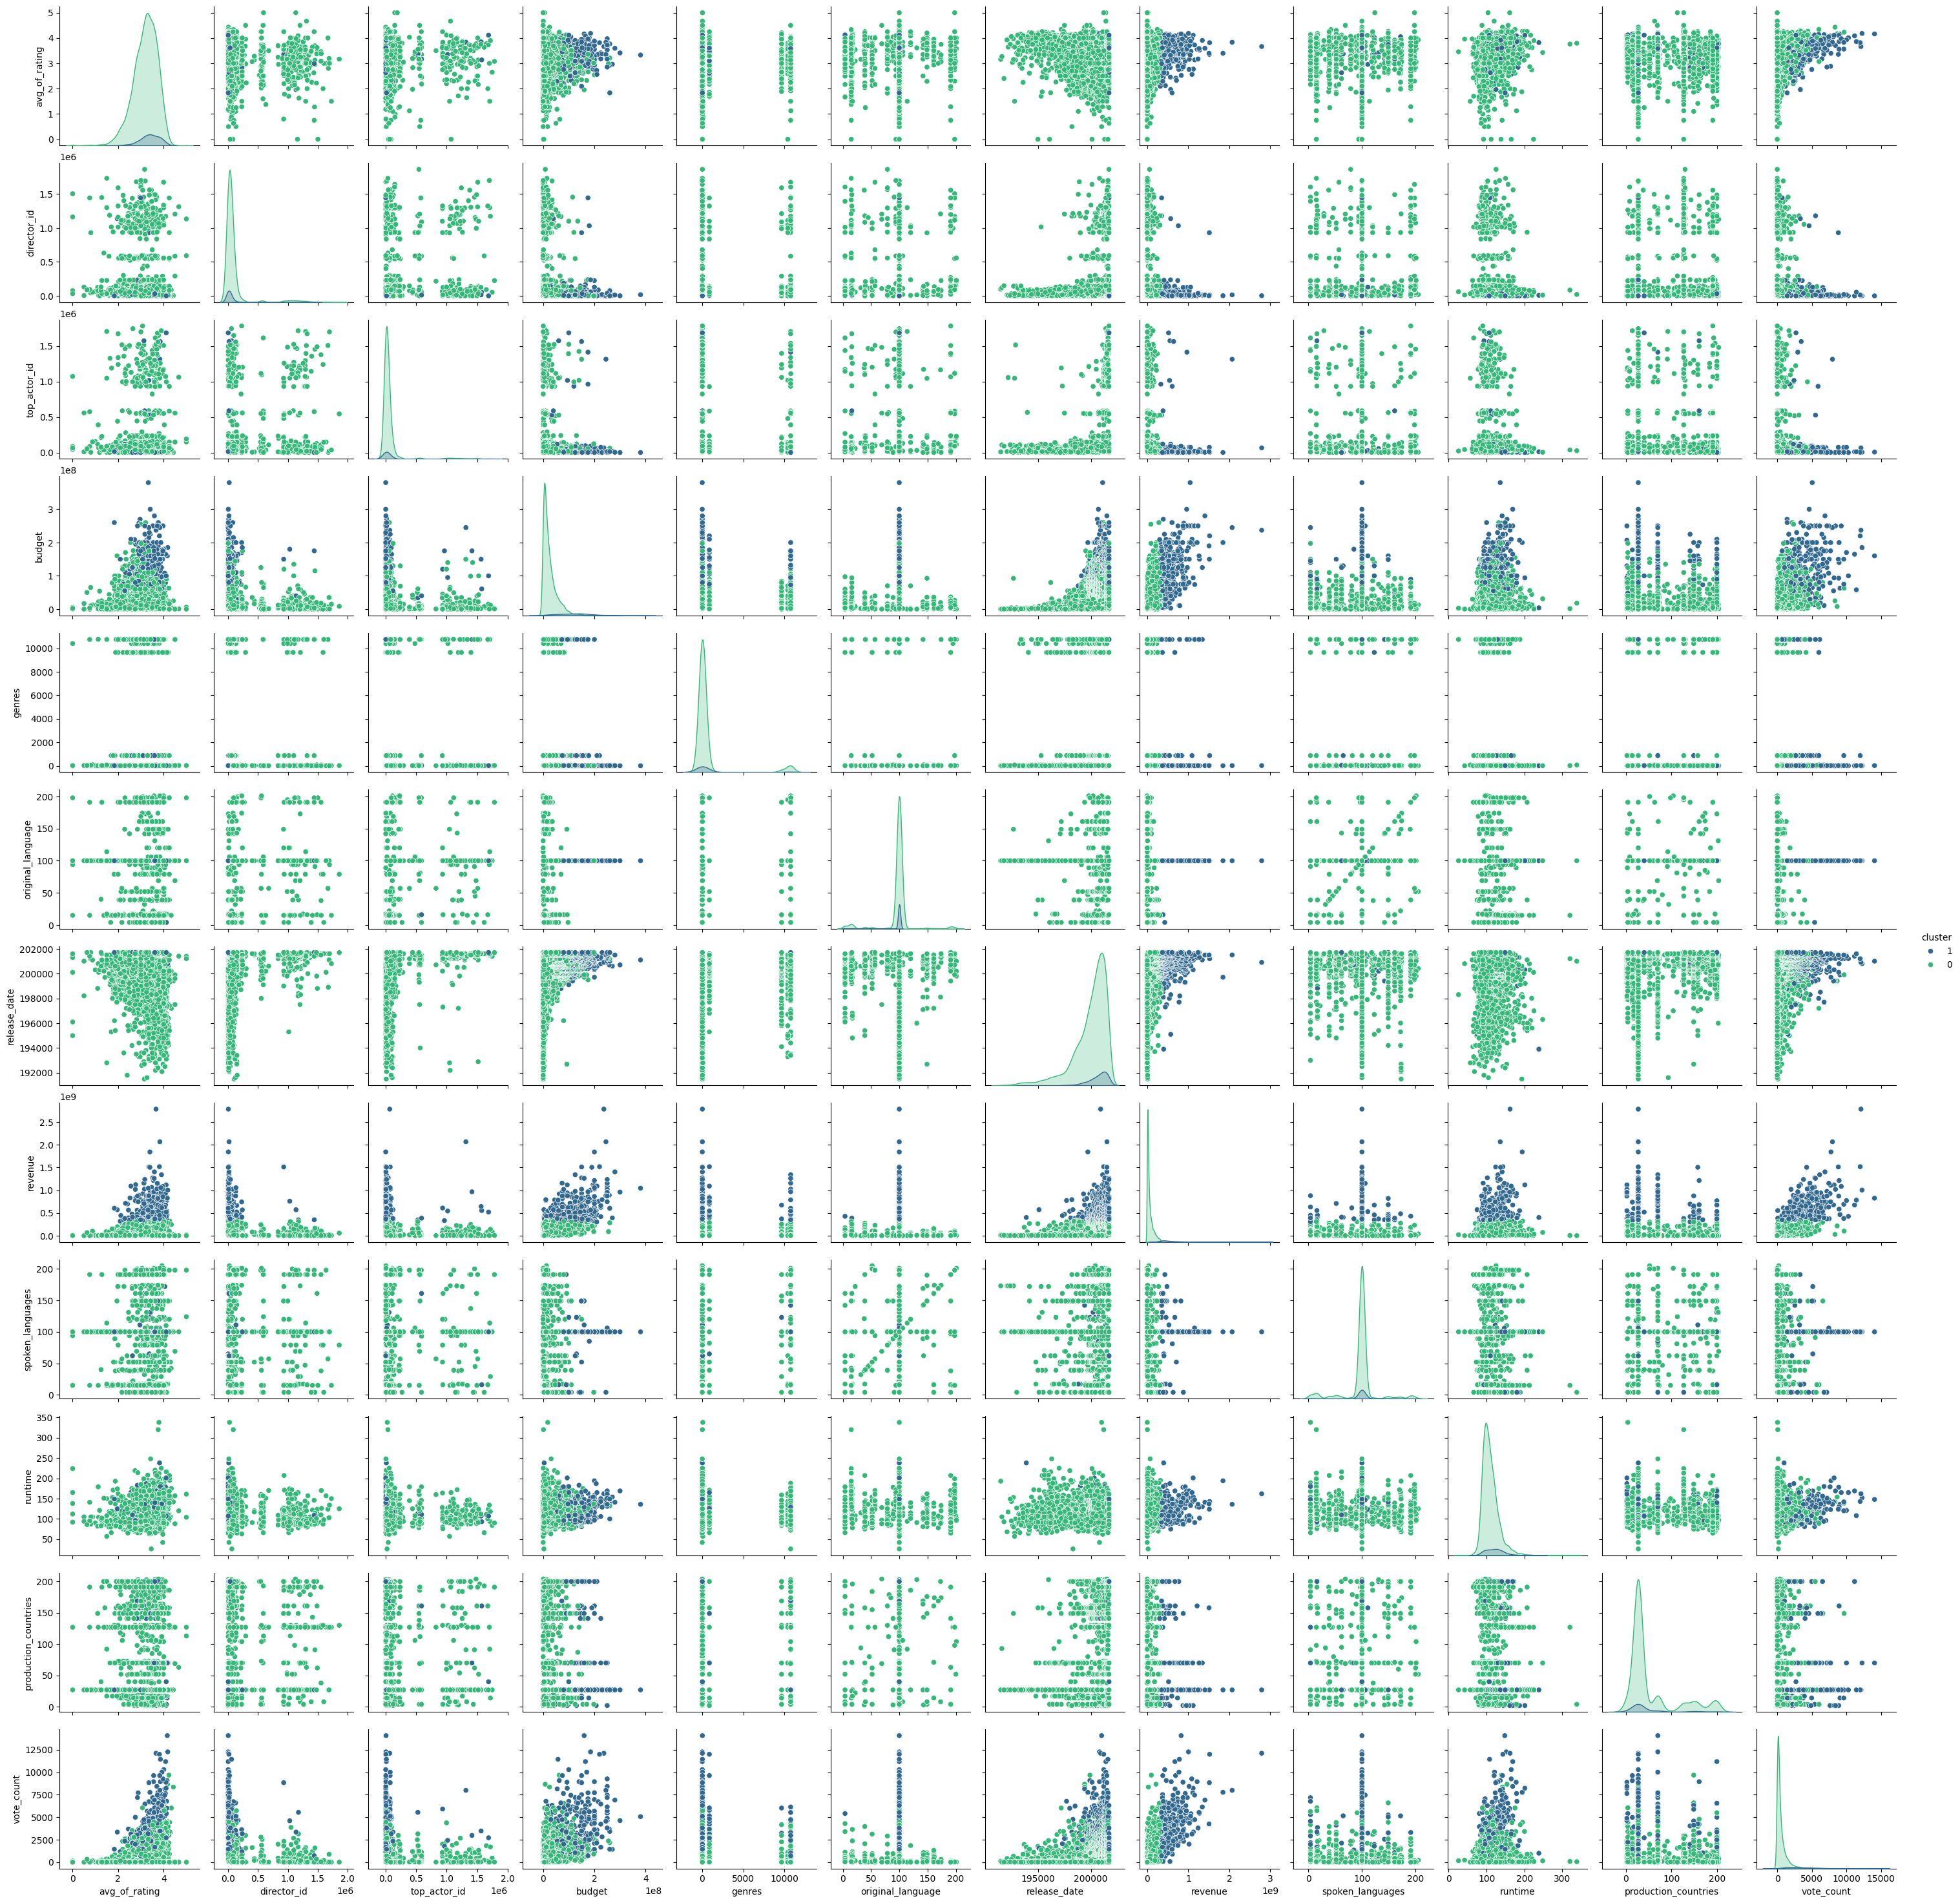

In [49]:
# Fitting k-means with best num of clasters
kmeans_simple = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
movies_df["cluster"] = kmeans_simple.fit_predict(X_clustering_simple)

# Grouping the data by clusters to analyze the characteristics
cluster_summary_simple = movies_df.groupby("cluster").mean()[clustering_features_simple]
cluster_summary_simple["number_of_movies"] = movies_df["cluster"].value_counts()
print(cluster_summary_simple)

cluster_summary_simple.to_csv("output/cluster_summary.csv")


#            Understanding the results of the k-means

movies_df_clustering = movies_df[clustering_features_simple + ["cluster"]]

# Replacing the cluster labels with string labels for better visualization
movies_df_clustering["cluster"] = movies_df_clustering["cluster"].astype(str)

# Creating a pairplot to visualize all possible XY graphs of every k-means group
sns.pairplot(movies_df_clustering, hue="cluster", palette="viridis", diag_kind="kde")
plt.savefig("output/kmeans_pairplot.png")

clustering_features = [
    "adult",
    "budget",
    "genres",
    "original_language",
    "release_date",
    "revenue",
    "spoken_languages",
    "runtime",
    "production_countries",
    "vote_count",
]
#            Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Selecting features and target variable
X = movies_df[clustering_features]
y = movies_df["avg_of_rating"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the mean squared error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


## Wykorzystane metody badawcze

Do implementacji metod wykorzystaliśmy bibliotękę sciklearn, która zawiera już przygotowane klasy wykonujące pożądane przez nas metody:


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)
from sklearn.linear_model import LogisticRegression

Ładowanie danych. Dokonujemy podziału na dwie grupy według mediany ocen wszystkich filmów. Grupa pierwsza to filmy złe (wartość 0), a druga to filmy dobre (wartość 1). 

In [ ]:
data = pd.read_csv("output/movies_relevant_data_num_ids.csv")
threshold = data["avg_of_rating"].median()
data["label"] = (data["avg_of_rating"] >= threshold).astype(int)


In [74]:
from constants import NUMERICAL_COLUMNS
features = [
    "avg_of_rating",
    "director_id",
    "top_actor_id",
    "budget",
    "genres",
    "original_language",
    "release_date",
    "revenue",
    "spoken_languages",
    "runtime",
    "production_countries",
    "vote_count",
]
X = data[features].drop("avg_of_rating", axis=1)

y = data["label"]


TypeError: list indices must be integers or slices, not list

In [75]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Funkcja zwracająca macierz błędu dla danej metody:

In [77]:
def plot_confusion_matrix(y_test, y_pred):
    labels = np.array(y_test)
    preds = np.array(y_pred)
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(
        cm,
        annot=cm,
        fmt="d",
        xticklabels=["Przewidziany zły", "Przewidziany dobry"],
        yticklabels=["Faktycznie zły", "Faktycznie dobry"],
    )
    plt.xlabel("Przewidziany stan")
    plt.ylabel("Stan faktyczny")
    plt.title("Macierz błędu")
    plt.show()

### Regresja logistyczna

Regresja logistyczna to metoda statystyczna stosowana do przewidywania prawdopodobieństwa wystąpienia zdarzenia binarnego. Jest to powszechnie stosowana technika w uczeniu maszynowym ze względu na jej prostotę i interpretowalność.
* Źródło: *Hosmer, Fred A. Jr., Stanley Lemeshow. (2004). A Primer on Logistic Regression. Journal of the National Cancer Institute 96, nr 2: 102-107. https://pubmed.ncbi.nlm.nih.gov/34952854*


In [78]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns

logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

print("Logistic Regression")
print(f"Dokładność {accuracy_score(y_test, y_pred):.5f}")
log_reg_class_rap = classification_report(y_test, y_pred)

Logistic Regression
Dokładność 0.73132


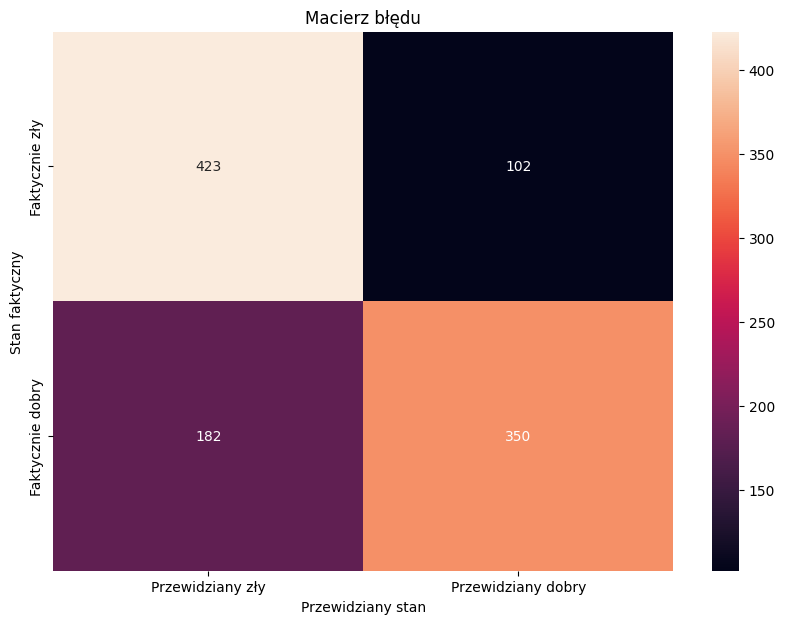

In [79]:
plot_confusion_matrix(y_test, y_pred)

### 2. Model K najbliższych sąsiadów (KNN)

Jest to algorytm, który klasyfikuje nowe punkty danych na podstawie ich podobieństwa do istniejących punktów danych w zbiorze treningowym.

* Źródło: *Mohseni, Mehrzad, Payam Ghahramani, Richard E. Fremouw. (2007). K-Nearest Neighbors for Multi-Label Classification. Proceedings of the 24th International Conference on Machine Learning. 1-2. https://www.jmlr.org/papers/volume25/23-0286/23-0286.pdf.*

Parametr k jest ilością sąsiadów do których podobieństwo sprawdzamy. 

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN")
print(f"Dokładność {accuracy_score(y_test, y_pred):.5f}")
knn_class_rap = classification_report(y_test, y_pred)

KNN
Dokładność 0.71050


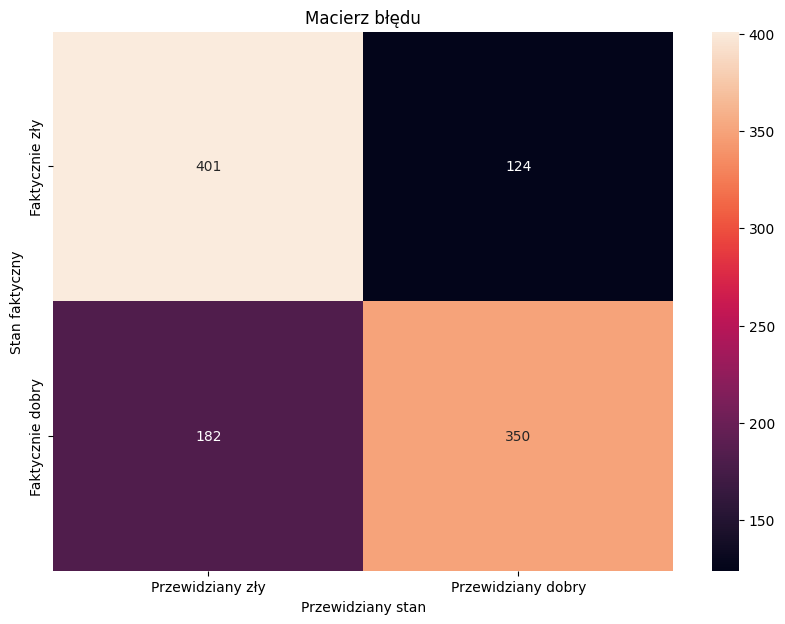

In [81]:
plot_confusion_matrix(y_test, y_pred)

Algorytm znajdowania najlepszej wartości parametru:

In [69]:
def knn_best_params(X_train, y_train, X_test, y_test):
    best_k = 0
    best_score = 0
    for k in range(1, 100):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        if score > best_score:
            best_score = score
            best_k = k

    return best_k, best_score

### 3. Model SVC (Support Vector Classification)

Jest to metoda, która znajduje granice decyzyjne między klasami danych poprzez identyfikację wektorów podporowych.

- Źródło: *Joachim, Thorsten. (2011). Support Vector Machines. Applied Mathematics and Optimization 62, nr. 2: 443-474. https://link.springer.com/chapter/10.1007/0-387-25465-X_12.*

In [57]:
from sklearn.svm import LinearSVC

svc = LinearSVC(dual=False, max_iter=10000)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Linear SVC")
print(f"Dokładność {accuracy_score(y_test, y_pred):.5f}")
lin_svc_class_rap = classification_report(y_test, y_pred)


Linear SVC
Dokładność 0.61211


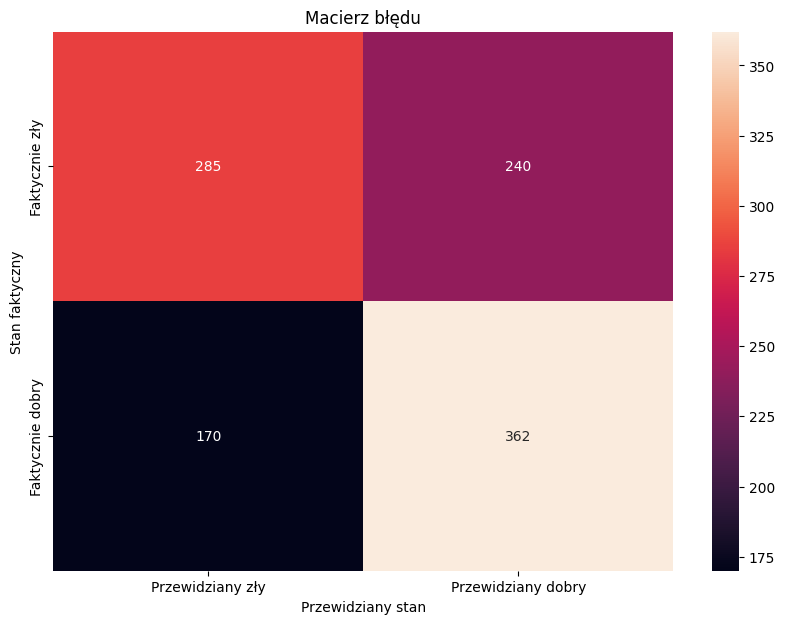

In [58]:
plot_confusion_matrix(y_test, y_pred)

### 4. Metoda hybrydowa

Przewiduje etykiety klas dla podanych wartości wejściowych za pomocą wymyślonej przez nas metody. Wykorzystuje następujące klasyfikatory:
- LinearSVC
- Regresję Logistyczną
- KNeighborsClassifier
Końcowa predykcja jest średnią arytmetyczną z predykcji trzech klasyfikatorów.

In [72]:
def hybrid_method_predict(X_vals, X_train) -> np.ndarray:
    svc = LinearSVC(dual=True, max_iter=10000)
    svc.fit(X_train, y_train)
    d1 = svc.predict(X_vals)

    logistic = LogisticRegression(max_iter=10000)
    logistic.fit(X_train, y_train)
    d2 = logistic.predict(X_vals)

    knn = KNeighborsClassifier(n_neighbors=31)
    knn.fit(X_train, y_train)
    d3 = knn.predict(X_vals)

    ans = []
    for val1, val2, val3 in zip(d1, d2, d3):
        num_of_zeros = 0
        num_of_ones = 0
        for val in [val1, val2, val3]:
            if val == 0:
                num_of_zeros += 1
            else:
                num_of_ones += 1
        ans.append(1 if num_of_zeros <= num_of_ones else 0)

    return np.array(ans)
y_pred = hybrid_method_predict(X_test, X_train)
print("Hybrid Method")
print(f"Dokładność {accuracy_score(y_test, y_pred):.5f}")
hybrid_class_rap = classification_report(y_test, y_pred)


C:\Users\Jakub Szala\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Hybrid Method
Dokładność 0.66982


### Raporty klasyfikcaji

In [82]:
print("K najbliższych sąsiadów:")
print(knn_class_rap)
print("Regresja logistyczna:")
print(log_reg_class_rap)
print("SVC:")
print(lin_svc_class_rap)
print("Hybrydowa metoda:")
print(hybrid_class_rap)


 		Raporty klasyfikcaji:

K najbliższych sąsiadów:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       525
           1       0.74      0.66      0.70       532

    accuracy                           0.71      1057
   macro avg       0.71      0.71      0.71      1057
weighted avg       0.71      0.71      0.71      1057

Regresja logistyczna:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       525
           1       0.77      0.66      0.71       532

    accuracy                           0.73      1057
   macro avg       0.74      0.73      0.73      1057
weighted avg       0.74      0.73      0.73      1057

SVC:
              precision    recall  f1-score   support

           0       0.63      0.54      0.58       525
           1       0.60      0.68      0.64       532

    accuracy                           0.61      1057
   macro avg       0.61      0.61      0.61      

### Walidacja krzyżowa

In [90]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=10)

score_knn = cross_val_score(knn, X, y, cv=10)
score_svc = cross_val_score(svc, X, y, cv=10)
score_logistic = cross_val_score(logistic, X, y, cv=10)
# Wyświetlenie wyników
print(f"Średni wynik walidacji krzyżowej: {scores.mean():.2f}")
print(f"Odchylenie standardowe wyników: {scores.std():.2f}")

Średni wynik walidacji krzyżowej: 0.70
Odchylenie standardowe wyników: 0.05


### Testowanie modelu na sztucznie wytworzonych obserwacjach

In [85]:
def generate_random_values(num_samples=10):
    df = pd.read_csv("./output/movies_relevant_data_num_ids.csv")
    df.drop("avg_of_rating", axis=1, inplace=True)  # Drop the target column
    df.drop(
        "movieId_movies_metadata", axis=1, inplace=True
    )  # Drop the movieId column (it's not a feature
    random_movies = []
    columns = df.columns

    for _ in range(num_samples):
        movie = {}
        for column in columns:
            if column == "avg_of_rating":
                movie[column] = np.random.uniform(df[column].min(), df[column].max())
            else:
                movie[column] = int(np.random.uniform(min(df[column]), max(df[column])))
        random_movies.append(movie)

    return pd.DataFrame(random_movies)


if __name__ == "__main__":
    random_movies_df = generate_random_values(num_samples=10)

    print(generate_random_values(10))


      budget  director_id  top_actor_id  genres  original_language  \
0  286541414       980584        716645     937                119   
1  176025365       742466       1153699   10755                193   
2  207788555        46320       1129086    3135                 99   
3  354713843      1732420       1447849   10035                 52   
4   62797788       188372        232181    5516                187   
5   20892354      1390305       1678360    2034                 51   
6   26235215        71204        857515     333                172   
7  288582839       511632        571180    9230                161   
8  161992667       460825       1764094    3641                174   
9   68597220      1072197        172470    5722                158   

   release_date     revenue  spoken_languages  runtime  production_countries  \
0        192952   961568354               191      179                   151   
1        192676  2149994359                84       69               

In [ ]:
rand_values = generate_random_values(len(X_test))
rand_values = scaler.fit_transform(rand_values)

print("\nPredykcja dla losowych danych:\n")
y_pred = knn.predict(rand_values)
acc_sc = accuracy_score(y_test, y_pred)
print(f"KNN - wynik dokładności: {acc_sc}")
y_pred = logistic.predict(rand_values)
acc_sc = accuracy_score(y_test, y_pred)
print(f"Regresja logistyczna - wynik dokładności : {acc_sc}")
y_pred = svc.predict(rand_values)
acc_sc = accuracy_score(y_test, y_pred)
print(f"SVC - wynik dokładności: {acc_sc}")
y_pred = hybrid_method_predict(rand_values, X_train)
acc_sc = accuracy_score(y_test, y_pred)
print(f"Hybrydowa metoda - wynik dokładności: {acc_sc}")

## Wnioski

Większość filmów należy do gorszej grupy. Jedynie koło 10% filmów można nazwać "dobrymi". Osiągamy około 73% dokładności klasyfikacji.

## Bibliografia

*Hosmer, Fred A. Jr., Stanley Lemeshow. (2004). A Primer on Logistic Regression. Journal of the National Cancer Institute 96, nr 2: 102-107. https://pubmed.ncbi.nlm.nih.gov/34952854*

*Mohseni, Mehrzad, Payam Ghahramani, Richard E. Fremouw. (2007). K-Nearest Neighbors for Multi-Label Classification. Proceedings of the 24th International Conference on Machine Learning. 1-2. https://www.jmlr.org/papers/volume25/23-0286/23-0286.pdf.*

*Joachim, Thorsten. (2011). Support Vector Machines. Applied Mathematics and Optimization 62, nr. 2: 443-474. https://link.springer.com/chapter/10.1007/0-387-25465-X_12.*